In [2]:
import slangpy as spy
import pathlib
import MaterialX as mx

currentFolder = pathlib.Path().cwd()
# Create a Slang device with the current folder included in the search paths.
device = spy.create_device(include_paths=[str(currentFolder),
])

slang_source = """
// A simple function that adds two numbers together
float add(float a, float b)
{
    return a + b;
}
"""

# A Slang module represents a collection of Slang code that can be compiled and executed on the device. 
#module = spy.Module.load_from_file(device, "example.slang")
module = spy.Module.load_from_source(device, "example.slang", slang_source)
funct = module.find_function("add")
if funct:
  a = 3.0
  b = 4.5  
  result = funct.call(b=b, a=a)
  print(f"Result of add({a}, {b}): {result}")
#help(funct)

Result of add(3.0, 4.5): 7.5


In [3]:
import numpy as np

# Create a couple of buffers containing 1,000,000 random floats
a = np.random.rand(1000000).astype(np.float32)
b = np.random.rand(1000000).astype(np.float32)

# Call our function and request a numpy array as the result (the default would be a buffer)
result = module.add(a, b, _result='numpy')

# Print the first N results
print(result[:20])

[1.2196507  0.8921118  1.2757014  1.5387511  1.1072731  1.3194312
 1.0369809  1.4569685  0.6178469  0.7766143  0.65438366 0.86052036
 1.0806316  1.2912128  1.5185287  0.9183953  0.8490621  0.526107
 1.6616025  0.81510705]


SlangPy Learning Stuff

See: https://slangpy.shader-slang.org/en/latest/src/basics/buffers.html

<class 'slangpy.Texture'>
<class 'numpy.ndarray'>
[[0.9311499  0.01751107 0.74996257 1.1890409  0.45811823]
 [0.28365564 1.2506182  0.49091533 0.8295698  0.9859694 ]
 [1.5034366  0.46416837 0.17059335 1.2456422  0.9954756 ]
 [1.3717403  0.66462696 1.1878301  0.6276434  1.8604033 ]
 [0.55820936 0.22518289 1.1155202  0.925306   1.0930848 ]]
Saving image to add_random.png


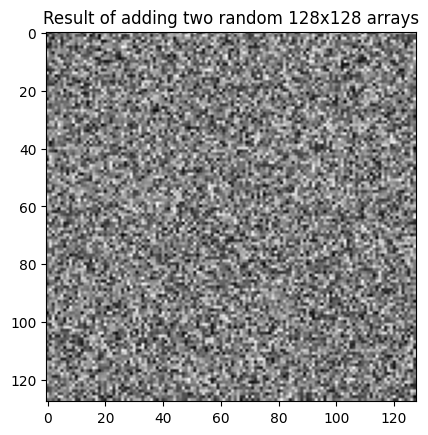

HTML <img> tag: 
<IPython.core.display.HTML object>

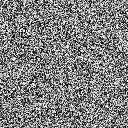


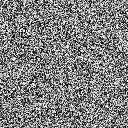

In [ ]:
import numpy as np

# Create a couple of buffers with 128x128 random floats
a = np.random.rand(128, 128).astype(np.float32)
b = np.random.rand(128, 128).astype(np.float32)

# Call our function and ask for a texture back
result = module.add(a, b, _result='texture')
print(type(result))

# Print the first 5x5 values
values = result.to_numpy()
print(type(values))
print(values[:5, :5])

# Save image to disk using OpenImageIO
import imageio
print("Saving image to add_random.png")
imageio.imwrite('add_random.png', (values * 255).astype(np.uint8))

# Display the result using tev.
# A tev is a standalone image viewer that needs to be installed and started before calling show
# as this just sends data via IPC to the running tev instance.
# Test if not running in external shell
#spy.tev.show(result, name='add random')

# Use matpltlib to display the result
import matplotlib.pyplot as plt
plt.imshow(values, cmap='gray')
plt.title('Result of adding two random 128x128 arrays')
plt.show()

# Write image to data that can be shown in an html <img> tag
import io
img_bytes = io.BytesIO()
imageio.imwrite(img_bytes, (values * 255).astype(np.uint8), format='png')
img_bytes = img_bytes.getvalue()
import base64
img_base64 = base64.b64encode(img_bytes).decode('utf-8')
html_img_tag = f'<img src="data:image/png;base64,{img_base64}" alt="Result Image"/>'
print("HTML <img> tag:", html_img_tag)

# Write html to a file
with open('result_image.html', 'w') as f:
    f.write(html_img_tag)

# Output html to notebook output
from IPython.display import display, HTML
display(HTML(html_img_tag))
